In [332]:
#from google.colab import files
#files.upload()

# Data Analysis

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [334]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [335]:
df.shape

(569, 33)

In [336]:
df.info()        #column wise data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [337]:
df.isnull().sum()         # counting no. of null values in columns

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [338]:
df = df.drop(['id','Unnamed: 32'], axis=1)              # removing empty column 'Unnamed: 32' and non useful column 'id'

In [339]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [340]:
df.shape

(569, 31)

In [341]:
df.duplicated().sum()              # counting no. of duplicate rows

np.int64(0)

In [342]:
 # counting no. of zeros in each column

for column in df.columns:
    zero_count = (df[column] == 0).sum()
    print(f"Column '{column}': {zero_count} zeros")

Column 'diagnosis': 0 zeros
Column 'radius_mean': 0 zeros
Column 'texture_mean': 0 zeros
Column 'perimeter_mean': 0 zeros
Column 'area_mean': 0 zeros
Column 'smoothness_mean': 0 zeros
Column 'compactness_mean': 0 zeros
Column 'concavity_mean': 13 zeros
Column 'concave points_mean': 13 zeros
Column 'symmetry_mean': 0 zeros
Column 'fractal_dimension_mean': 0 zeros
Column 'radius_se': 0 zeros
Column 'texture_se': 0 zeros
Column 'perimeter_se': 0 zeros
Column 'area_se': 0 zeros
Column 'smoothness_se': 0 zeros
Column 'compactness_se': 0 zeros
Column 'concavity_se': 13 zeros
Column 'concave points_se': 13 zeros
Column 'symmetry_se': 0 zeros
Column 'fractal_dimension_se': 0 zeros
Column 'radius_worst': 0 zeros
Column 'texture_worst': 0 zeros
Column 'perimeter_worst': 0 zeros
Column 'area_worst': 0 zeros
Column 'smoothness_worst': 0 zeros
Column 'compactness_worst': 0 zeros
Column 'concavity_worst': 13 zeros
Column 'concave points_worst': 13 zeros
Column 'symmetry_worst': 0 zeros
Column 'fract

In [343]:
df['diagnosis'].value_counts()          # checking if data is balanced or not

,count
diagnosis,
B,357
M,212


<Axes: xlabel='diagnosis', ylabel='count'>

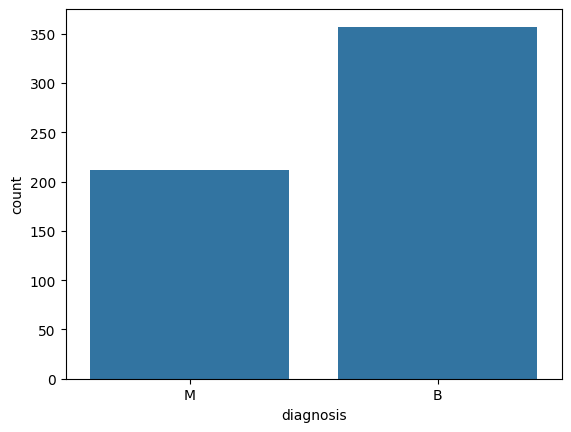

In [344]:
sns.countplot(x='diagnosis', data=df)

In [345]:
# Label encoding : converts object values to numeric of diagnosis column

from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == 'object':
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    print(le.classes_)


# here conversion is: 'B'=0 & 'M'=1  ( follows Alphabetical order)


['B' 'M']


In [346]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


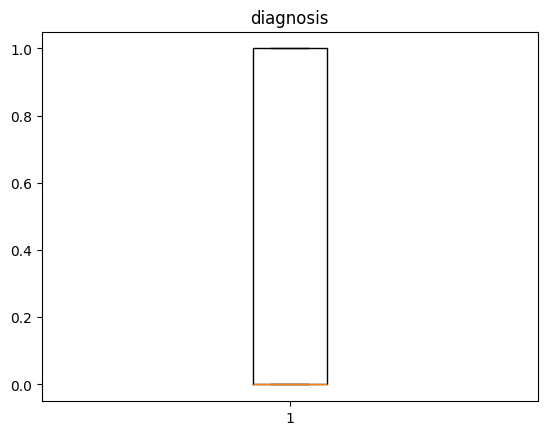

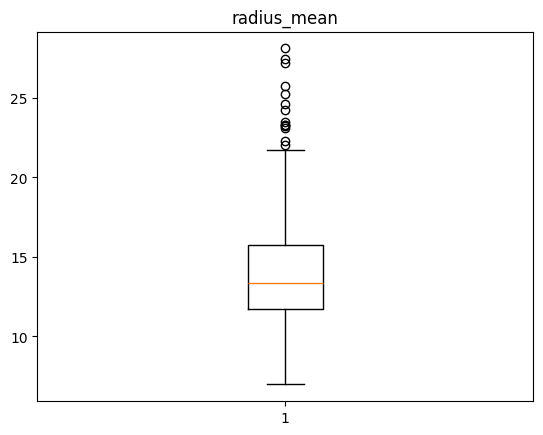

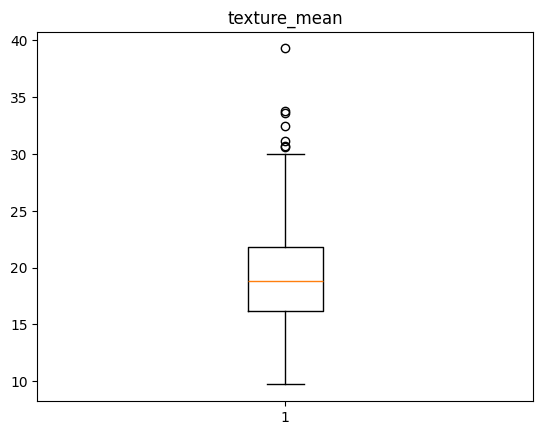

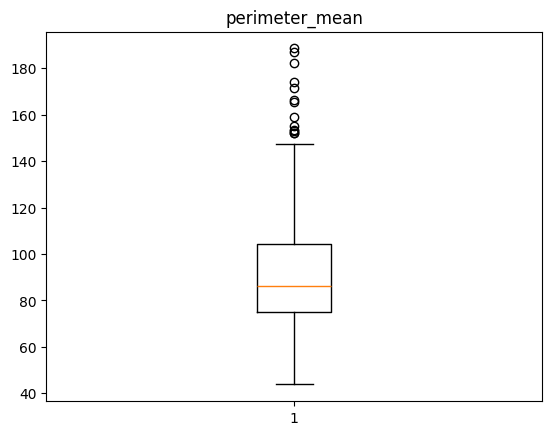

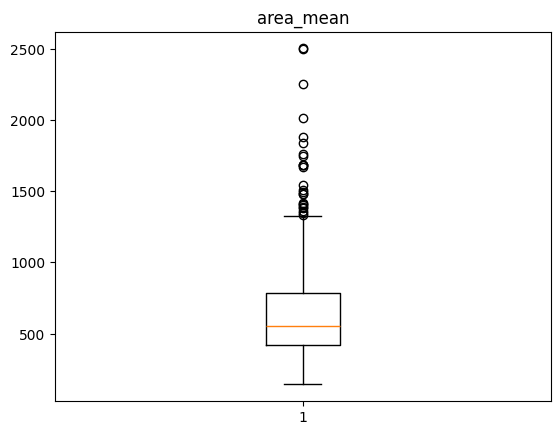

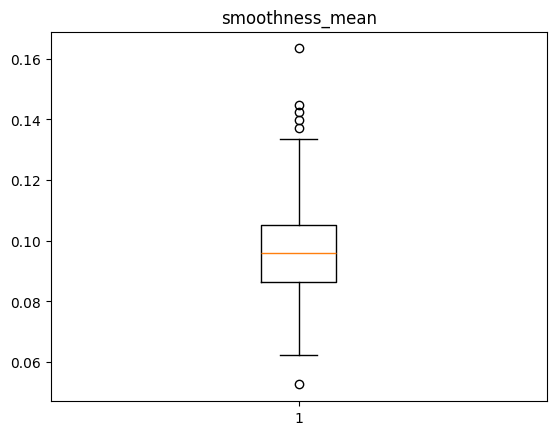

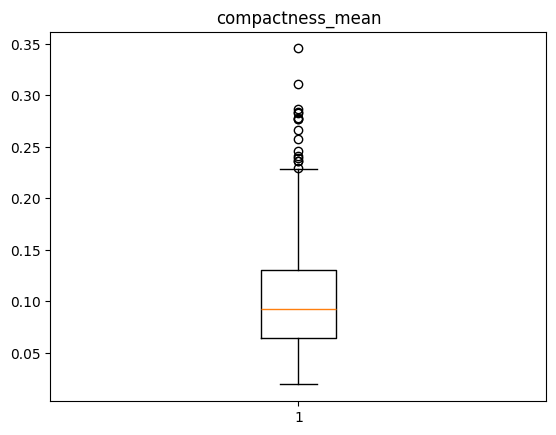

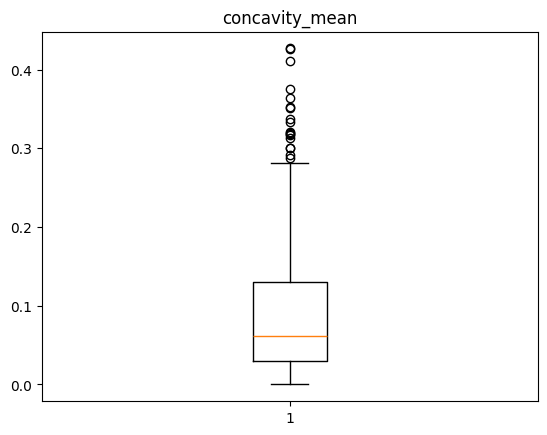

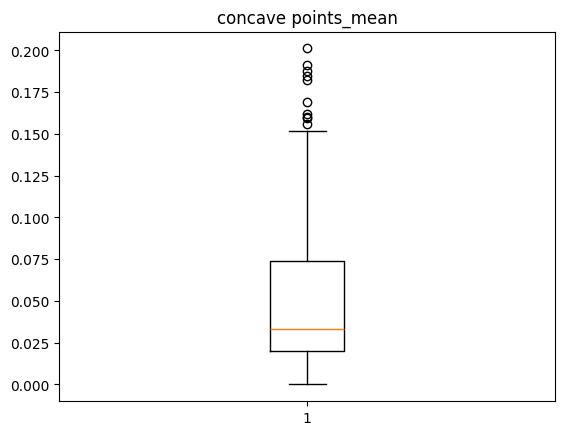

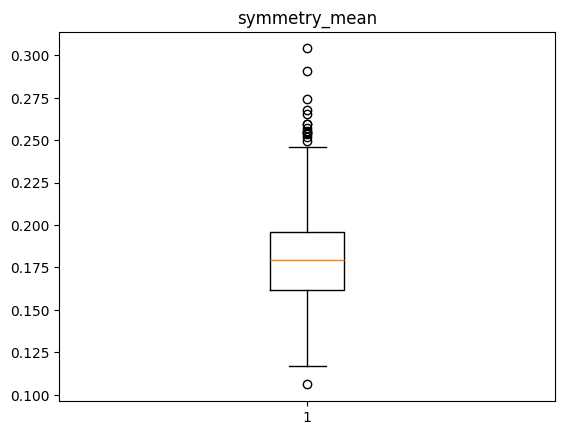

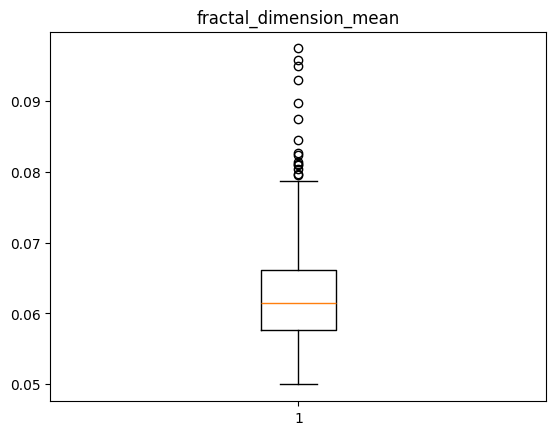

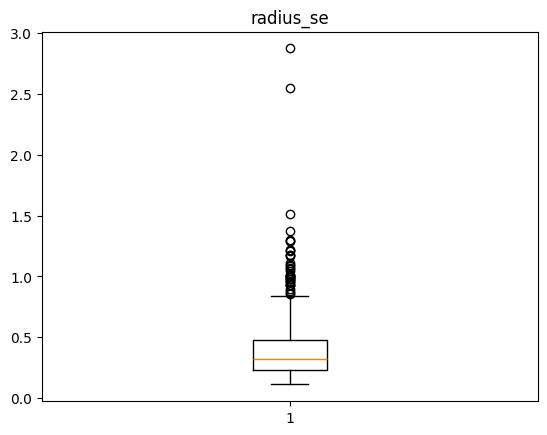

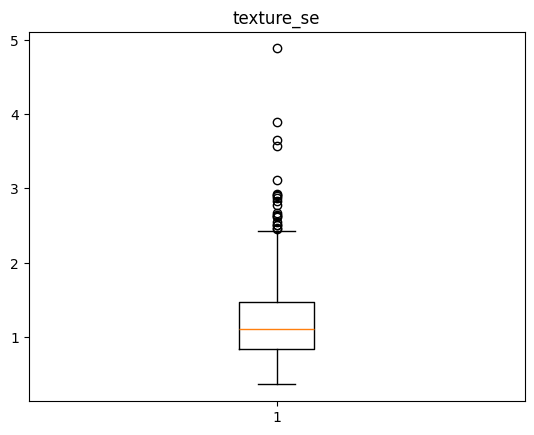

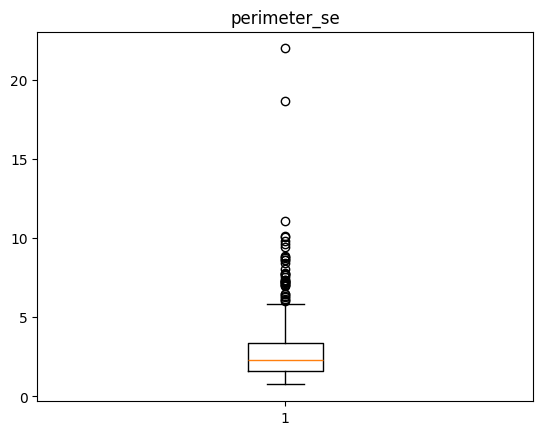

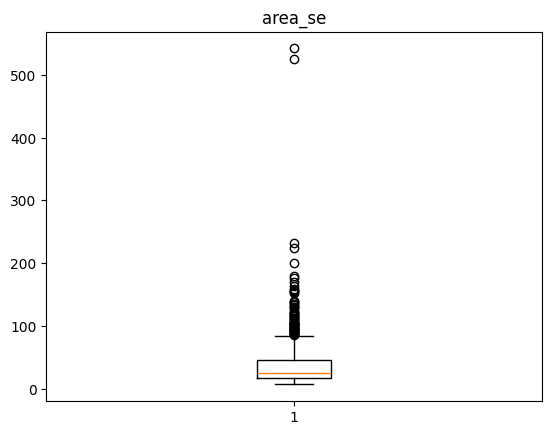

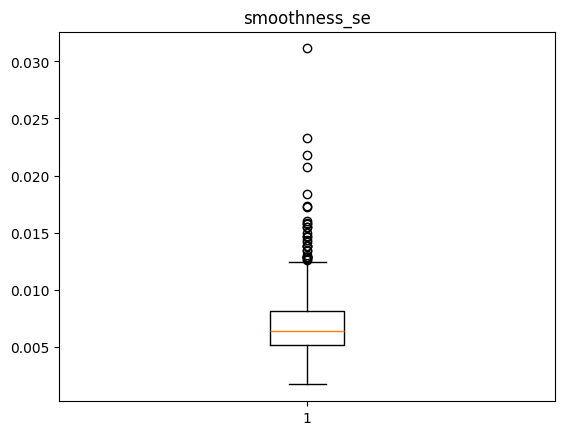

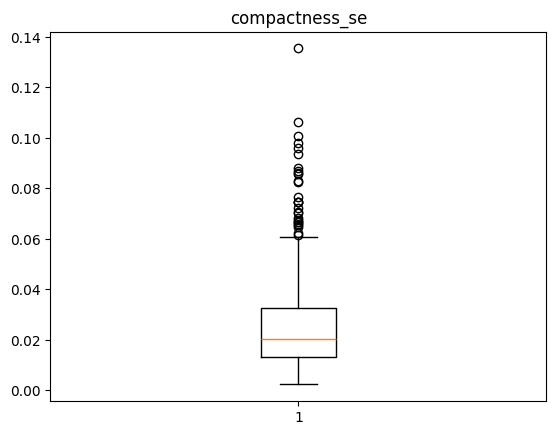

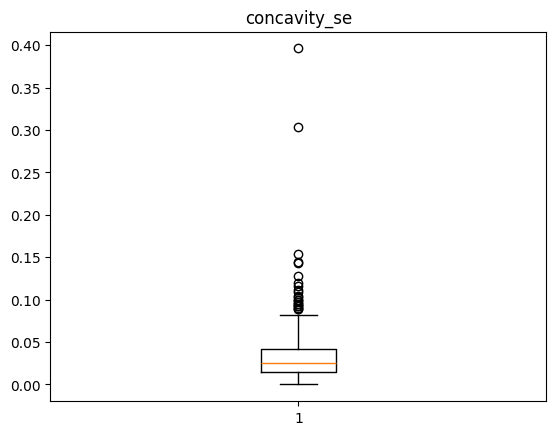

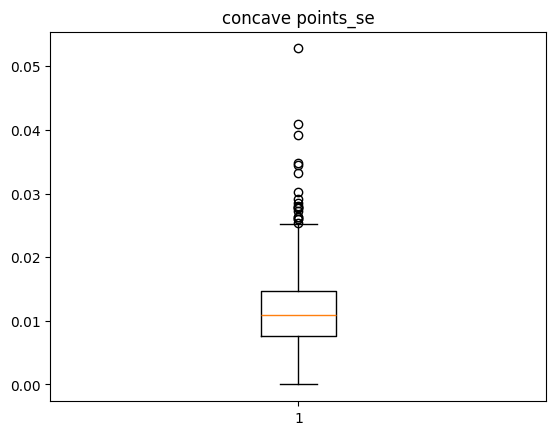

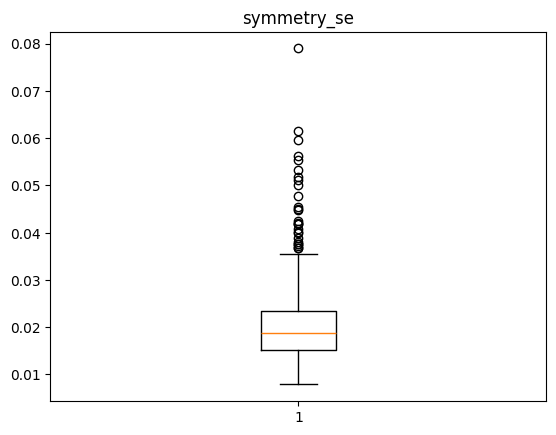

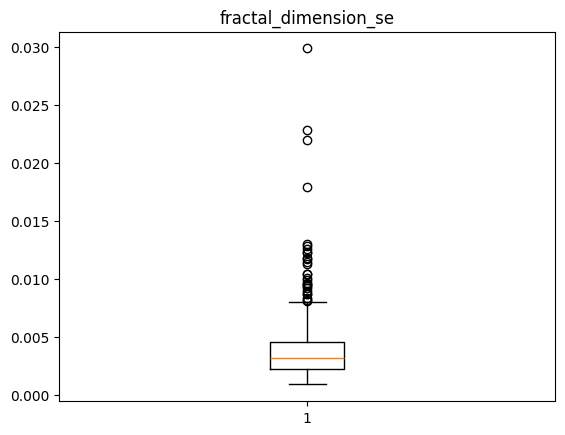

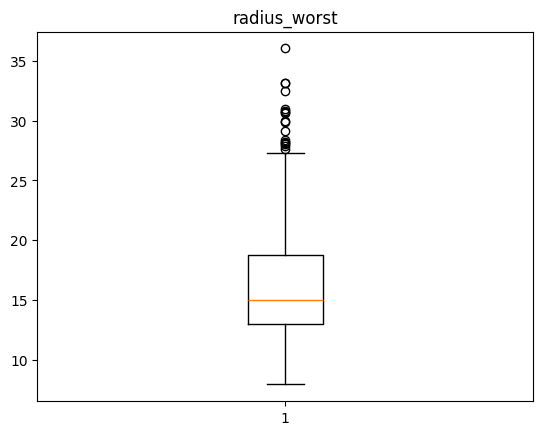

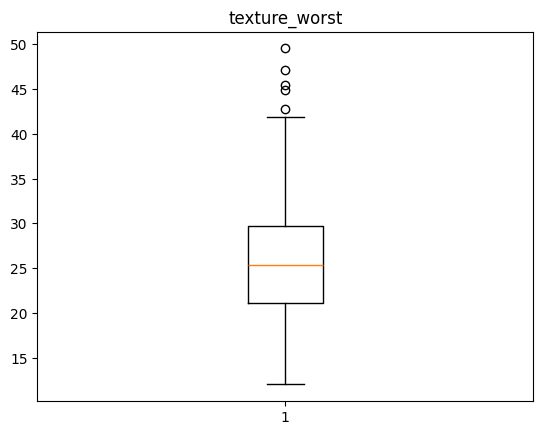

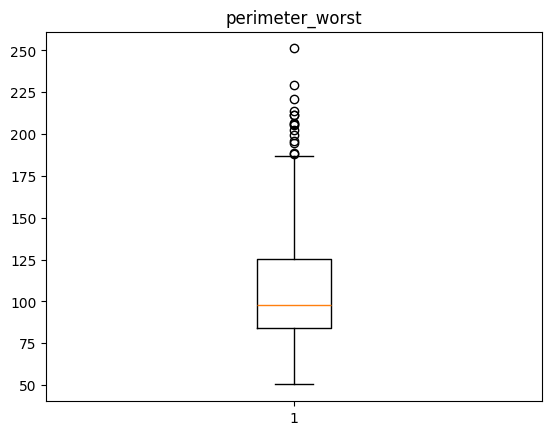

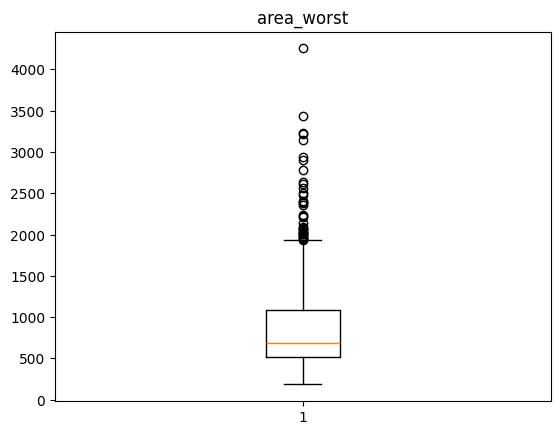

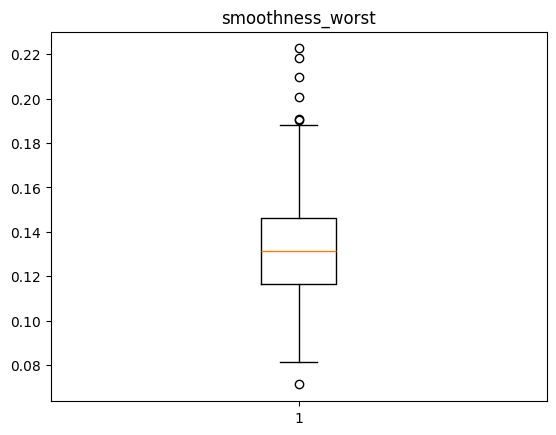

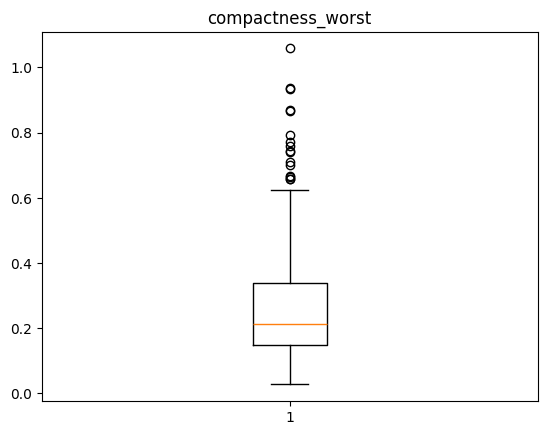

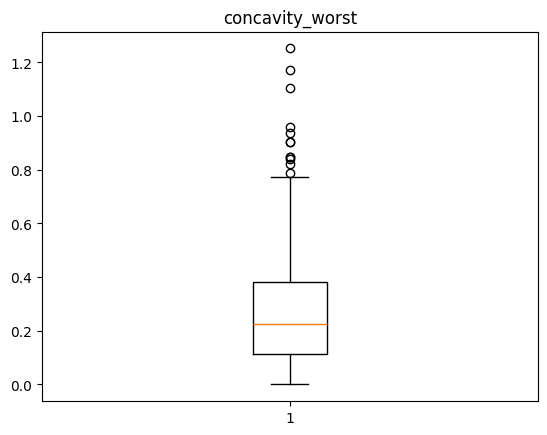

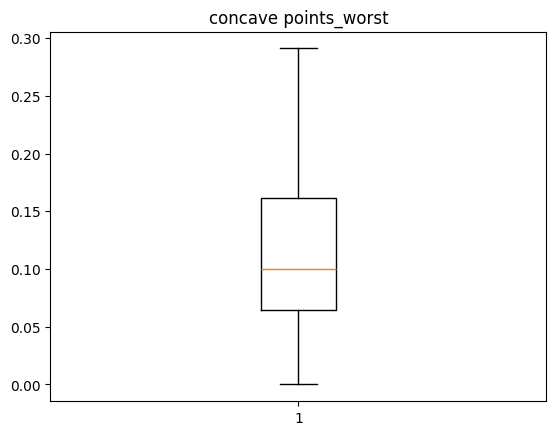

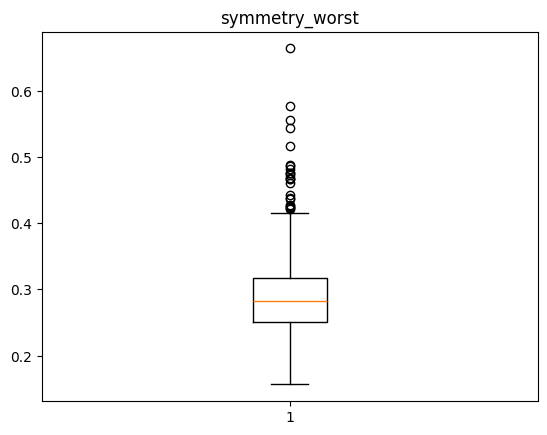

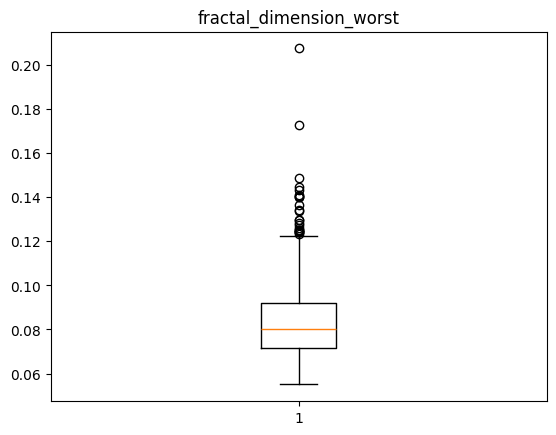

In [347]:
# Boxplot to see outliers

for column in df.columns:
  plt.boxplot(df[column])
  plt.title(column)
  plt.show()


# We are not removing outliers as there may be different Medical circumstances

Heatmap and VIF score to understand correlation:
- to understand relationship
- No Feature selection is done to match results in the Research paper


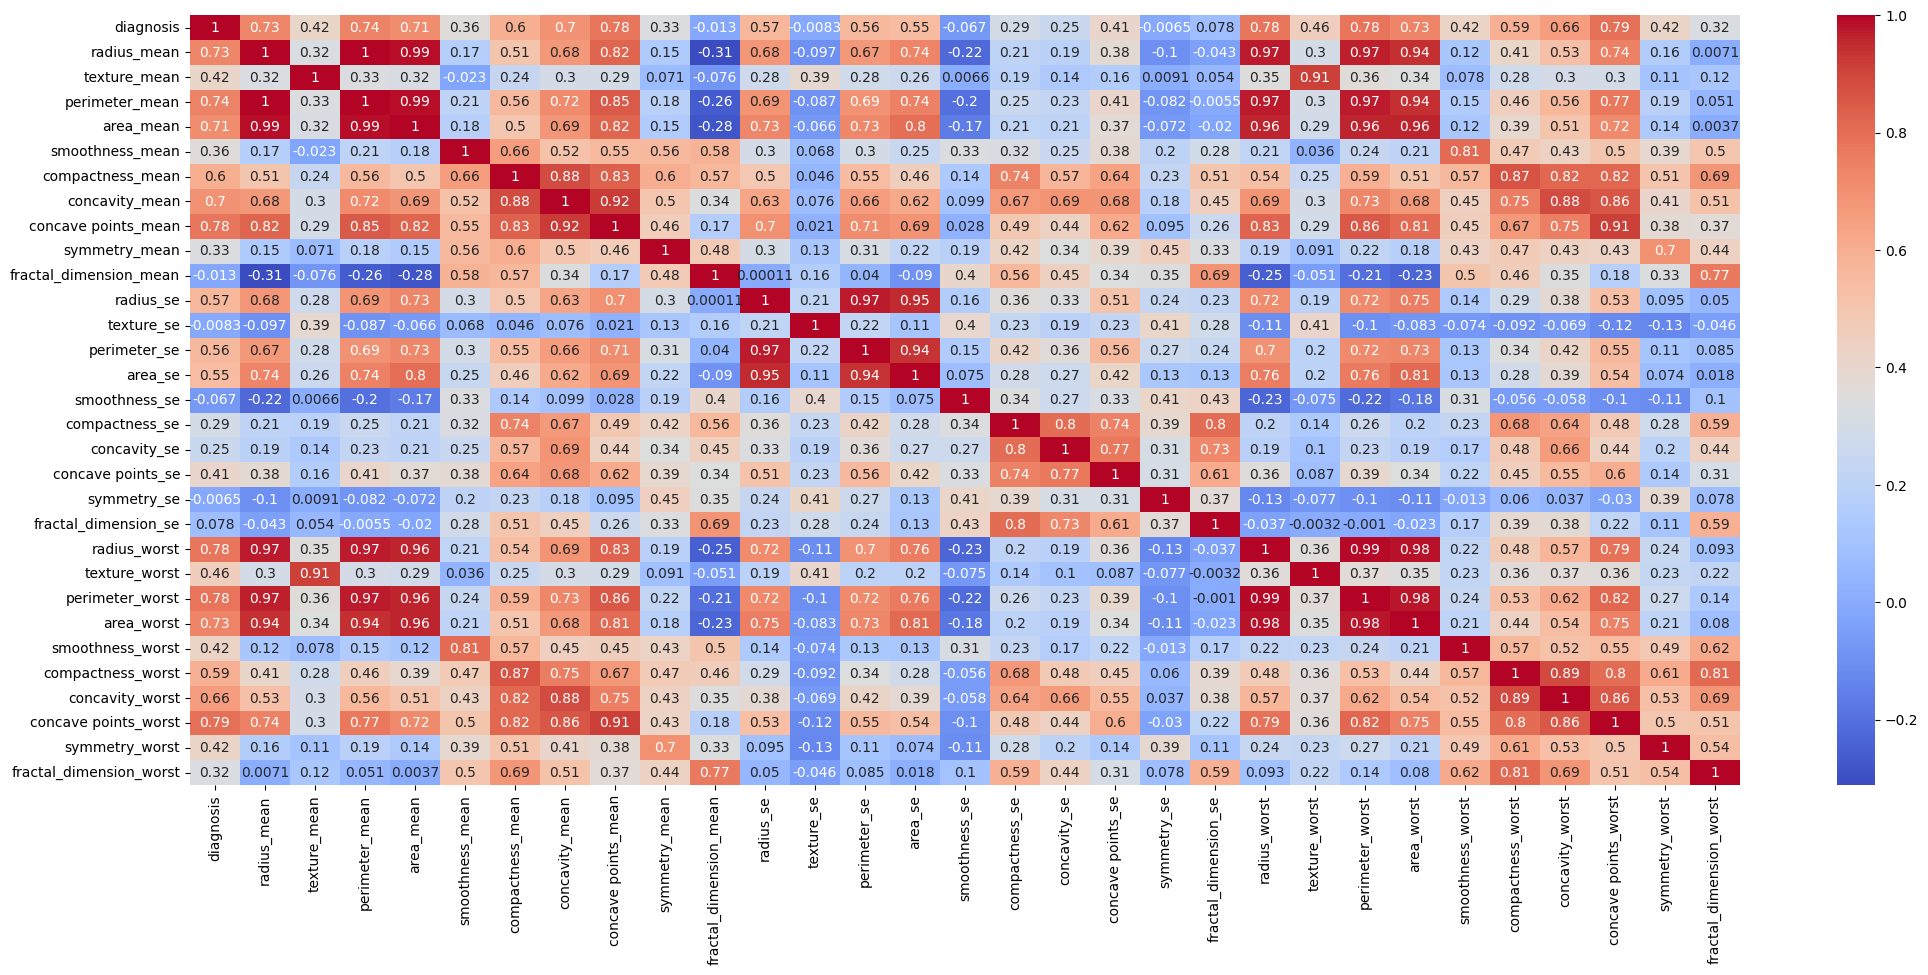

In [348]:
# Heatmap

plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()




In [349]:
# Checking correlation between columns


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
# Prepare the data for VIF calculation
# Add a constant column for the intercept term, which is often needed for VIF calculation
X = df.drop('diagnosis', axis=1)
X = sm.add_constant(X)

vif_data["Features"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                   Features          VIF
0                     const  1868.188844
1               radius_mean  3806.115296
2              texture_mean    11.884048
3            perimeter_mean  3786.400419
4                 area_mean   347.878657
5           smoothness_mean     8.194282
6          compactness_mean    50.505168
7            concavity_mean    70.767720
8       concave points_mean    60.041733
9             symmetry_mean     4.220656
10   fractal_dimension_mean    15.756977
11                radius_se    75.462027
12               texture_se     4.205423
13             perimeter_se    70.359695
14                  area_se    41.163091
15            smoothness_se     4.027923
16           compactness_se    15.366324
17             concavity_se    15.694833
18        concave points_se    11.520796
19              symmetry_se     5.175426
20     fractal_dimension_se     9.717987
21             radius_worst   799.105946
22            texture_worst    18.569966
23          peri

In [350]:
# Standardizing the dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Store column names before transformation
original_columns = X.columns

scaler.fit(X)       # trains scaler to scale the data

X = scaler.transform(X)        # transforming intial data to scaled data

X = pd.DataFrame(X, columns=original_columns)          # converting transformed numpy dataset arrays to DataFrame


In [351]:
# Comment above cell and run this if you want to use unscaled data

#X = df.drop('diagnosis', axis=1)
#y = df['diagnosis']

In [352]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [353]:
# Verifying Standardization result
# mean=0 and std=1

print(X.mean())
print('\n')
print(X.std())


radius_mean               -1.373633e-16
texture_mean               6.868164e-17
perimeter_mean            -1.248757e-16
area_mean                 -2.185325e-16
smoothness_mean           -8.366672e-16
compactness_mean           1.873136e-16
concavity_mean             4.995028e-17
concave points_mean       -4.995028e-17
symmetry_mean              1.748260e-16
fractal_dimension_mean     4.745277e-16
radius_se                  2.372638e-16
texture_se                -1.123881e-16
perimeter_se              -1.123881e-16
area_se                   -1.311195e-16
smoothness_se             -1.529727e-16
compactness_se             1.748260e-16
concavity_se               1.623384e-16
concave points_se          0.000000e+00
symmetry_se                8.741299e-17
fractal_dimension_se      -6.243785e-18
radius_worst              -8.241796e-16
texture_worst              1.248757e-17
perimeter_worst           -3.746271e-16
area_worst                 0.000000e+00
smoothness_worst          -2.372638e-16


In [354]:
# Data Splitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic Regression

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

# model training
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)


# Model Prediction:
y_train_predict = model_lr.predict(X_train)
y_test_predict = model_lr.predict(X_test)


Model Performance

In [356]:

# Model Accuracy score
train_accuracy = accuracy_score(y_train, y_train_predict)
print("train_accuracy :",train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_predict)
print("test_accuracy :",test_accuracy)
print('\n')


# training is done perfectly
# prediction of the model is also awesome
'''As there is not much difference in prediction of y_train and y_test data show that
   model is not underfitted or overfitted'''


train_accuracy : 0.9859154929577465
test_accuracy : 0.9790209790209791




'As there is not much difference in prediction of y_train and y_test data show that\n   model is not underfitted or overfitted'

In [357]:
# Classification report

print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



Confusion Matrix: [[87  2]
 [ 1 53]]




Text(0.5, 23.52222222222222, 'Predicted')

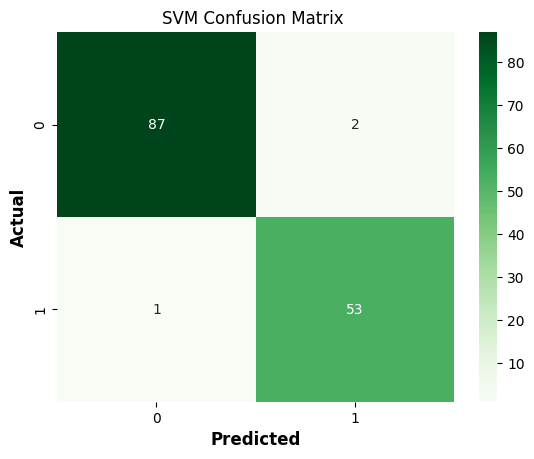

In [358]:
# Confusion Matrix

print('Confusion Matrix:',confusion_matrix(y_test,y_test_predict))
print('\n')

sns.heatmap(confusion_matrix(y_test,y_test_predict), annot=True, cmap='Greens')
plt.title('SVM Confusion Matrix ')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')

[1.24835315e-01 9.99988832e-01 9.97122446e-01 5.58167523e-04
 7.31049968e-05 1.00000000e+00 9.99999998e-01 9.62069271e-01
 4.11555128e-01 6.69997739e-04 5.33296986e-02 9.85326612e-01
 6.17914921e-03 8.58362152e-01 1.98209966e-03 9.98171979e-01
 1.94549842e-03 9.02497325e-06 7.96238488e-07 9.99998645e-01
 8.15888356e-02 1.04458585e-02 9.99999994e-01 7.45219641e-05
 1.05630654e-03 4.37859805e-04 1.31151470e-03 7.14335651e-03
 3.30847691e-03 9.99987945e-01 7.14190289e-04 1.65024005e-04
 1.73059406e-03 6.14262143e-03 1.48648637e-04 2.72049010e-03
 9.29641728e-01 3.12776816e-03 9.99897125e-01 4.34053546e-02
 8.72881690e-05 9.99616874e-01 3.77365431e-03 1.10841724e-03
 1.97543666e-02 7.71382586e-02 5.11702330e-04 2.87567976e-04
 3.62701064e-02 1.09434007e-03 9.99881235e-01 9.99999931e-01
 3.01232562e-01 1.95652830e-02 2.22868568e-05 9.23723220e-03
 1.21918147e-04 1.00000000e+00 8.61183574e-01 1.69668013e-04
 5.85939376e-03 9.99999477e-01 9.99999998e-01 2.89935235e-02
 7.24623575e-04 1.422559

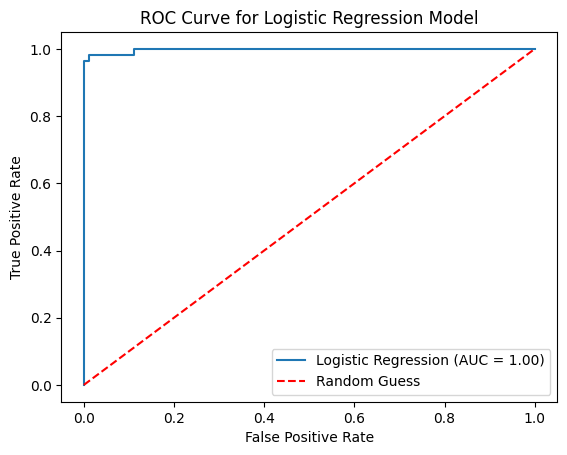

"A high AUC (close to 1) means that a randomly chosen positive instance is more likely to be ranked higher (assigned a higher probability) by the classifier\nthan a randomly chosen negative instance. It quantifies the model's ability to rank positive samples above negative samples."

In [359]:
# ROC curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for Logistic Regression model
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]       # probability of being class1 (Benign)
print(y_pred_proba_lr)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend()
plt.show()



''' - model.predict_proba(X_test): returns an array where each row contains two values:
      the probability of the sample belonging to class 0 and to class 1.
      By adding [:, 1], we are specifically selecting only the probabilities for the positive class (Malignant, or 1)
    - we use this to understand the model's certainty, when you want to set custom classification thresholds,
      or when calculating metrics like ROC curves (which require probabilities) or precision-recall curves.
'''

'''A high AUC (close to 1) means that a randomly chosen positive instance is more likely to be ranked higher (assigned a higher probability) by the classifier
than a randomly chosen negative instance. It quantifies the model's ability to rank positive samples above negative samples.'''

# K-Nearest Neighbour

In [360]:
# model selection
from sklearn.neighbors import KNeighborsClassifier

import math
math.sqrt(len(y_test))     # gives value of 'K'

11.958260743101398

In [361]:
#Model Selection
model_knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean')

#model training
model_knn.fit(X_train,y_train)

#model_prediction
y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn = model_knn.predict(X_test)

Model performance

In [362]:
#accuracy metrics
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn)
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)

accuracy_train_knn, accuracy_test_knn

(0.9671361502347418, 0.965034965034965)

In [363]:
# Classification report

print(classification_report(y_test,y_test_pred_knn))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



Confusion Matrix: [[87  2]
 [ 3 51]]




Text(0.5, 23.52222222222222, 'Predicted')

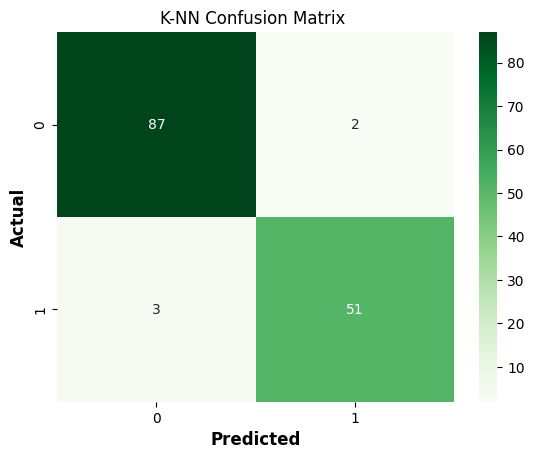

In [364]:
# Confusion Matrix

print('Confusion Matrix:',confusion_matrix(y_test,y_test_pred_knn))
print('\n')

sns.heatmap(confusion_matrix(y_test,y_test_pred_knn), annot=True, cmap='Greens')
plt.title('K-NN Confusion Matrix ')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')


[0.         1.         0.91666667 0.         0.         1.
 1.         0.83333333 0.75       0.         0.08333333 0.83333333
 0.16666667 0.66666667 0.         1.         0.         0.
 0.         1.         0.16666667 0.         1.         0.
 0.         0.         0.         0.08333333 0.         1.
 0.         0.         0.         0.         0.         0.
 0.66666667 0.         1.         0.08333333 0.         0.91666667
 0.         0.         0.08333333 0.08333333 0.         0.
 0.08333333 0.         1.         1.         0.66666667 0.08333333
 0.         0.         0.         1.         0.75       0.
 0.         1.         1.         0.16666667 0.         0.41666667
 1.         1.         0.         0.         0.66666667 0.91666667
 0.         0.91666667 0.         0.         0.08333333 0.16666667
 0.         0.         0.83333333 0.         0.5        1.
 0.83333333 1.         0.91666667 1.         0.         0.
 0.         0.41666667 0.08333333 0.         0.         0.
 1.     

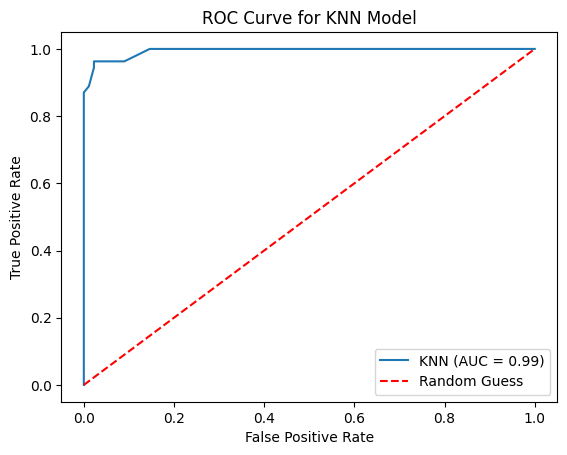

In [365]:
# ROC curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for KNN model
y_pred_proba_knn = model_knn.predict_proba(X_test)[:, 1]       # probability of being class1 (Benign)
print(y_pred_proba_knn)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend()
plt.show()


# Decision Tree

'Gini index' approach (default)

In [366]:
# Model selection and training
from sklearn.tree import DecisionTreeClassifier

#Model
clf_gini = DecisionTreeClassifier(random_state=0)
#Training
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [367]:
# Prediction

y_train_pred_gini = clf_gini.predict(X_train)
y_test_pred_gini = clf_gini.predict(X_test)

In [368]:
y_test_pred_gini

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [369]:
y_test.head()

,diagnosis
204,0
70,1
131,1
431,0
540,0


Gini Model Performance

In [370]:
# Accuracy

y_train_accuracy_gini = accuracy_score(y_train, y_train_pred_gini)
y_test_accuracy_gini = accuracy_score(y_test, y_test_pred_gini)

y_train_accuracy_gini, y_test_accuracy_gini

(1.0, 0.9300699300699301)

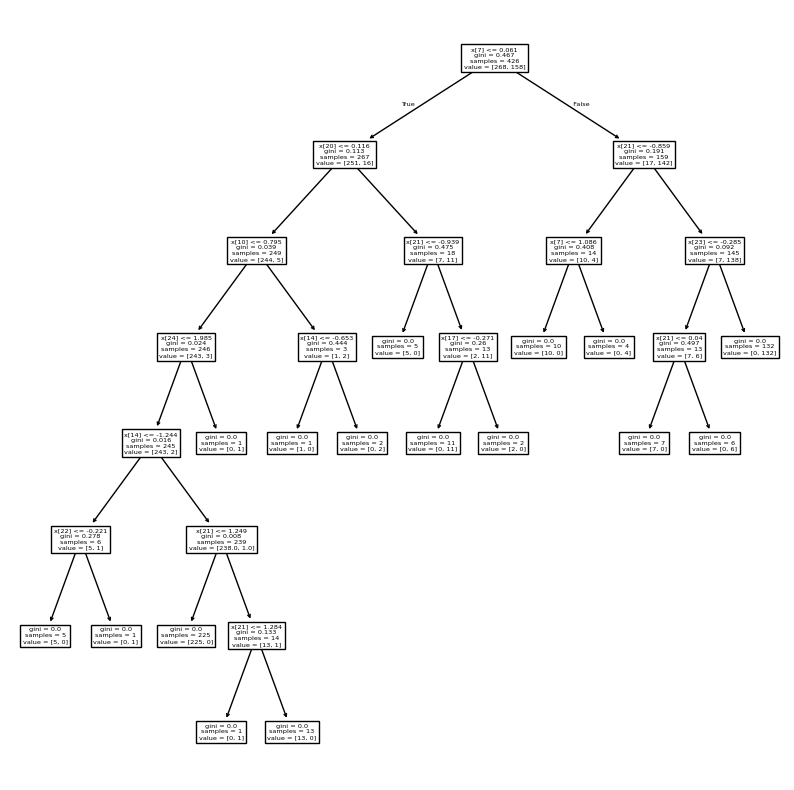

In [371]:
# Plot
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()

In [372]:
# Classification Report

print(classification_report(y_test, y_test_pred_gini))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        89
           1       0.88      0.94      0.91        54

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



Confusion Matrix: [[82  7]
 [ 3 51]]




Text(0.5, 23.52222222222222, 'Predicted')

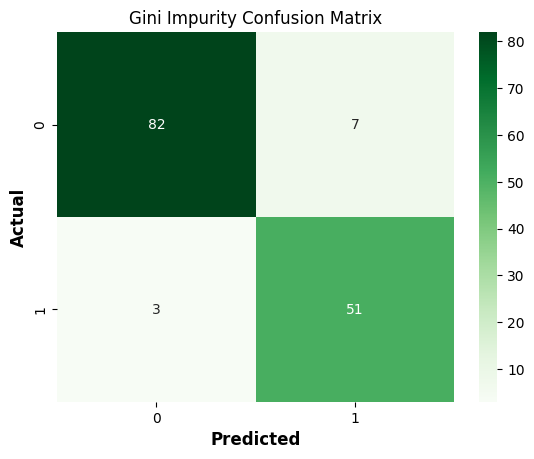

In [373]:
# Confusion Matrix

print('Confusion Matrix:', confusion_matrix(y_test, y_test_pred_gini))
print('\n')

sns.heatmap(confusion_matrix(y_test, y_test_pred_gini), annot=True, cmap='Greens')
plt.title('Gini Impurity Confusion Matrix')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')

[1.24835315e-01 9.99988832e-01 9.97122446e-01 5.58167523e-04
 7.31049968e-05 1.00000000e+00 9.99999998e-01 9.62069271e-01
 4.11555128e-01 6.69997739e-04 5.33296986e-02 9.85326612e-01
 6.17914921e-03 8.58362152e-01 1.98209966e-03 9.98171979e-01
 1.94549842e-03 9.02497325e-06 7.96238488e-07 9.99998645e-01
 8.15888356e-02 1.04458585e-02 9.99999994e-01 7.45219641e-05
 1.05630654e-03 4.37859805e-04 1.31151470e-03 7.14335651e-03
 3.30847691e-03 9.99987945e-01 7.14190289e-04 1.65024005e-04
 1.73059406e-03 6.14262143e-03 1.48648637e-04 2.72049010e-03
 9.29641728e-01 3.12776816e-03 9.99897125e-01 4.34053546e-02
 8.72881690e-05 9.99616874e-01 3.77365431e-03 1.10841724e-03
 1.97543666e-02 7.71382586e-02 5.11702330e-04 2.87567976e-04
 3.62701064e-02 1.09434007e-03 9.99881235e-01 9.99999931e-01
 3.01232562e-01 1.95652830e-02 2.22868568e-05 9.23723220e-03
 1.21918147e-04 1.00000000e+00 8.61183574e-01 1.69668013e-04
 5.85939376e-03 9.99999477e-01 9.99999998e-01 2.89935235e-02
 7.24623575e-04 1.422559

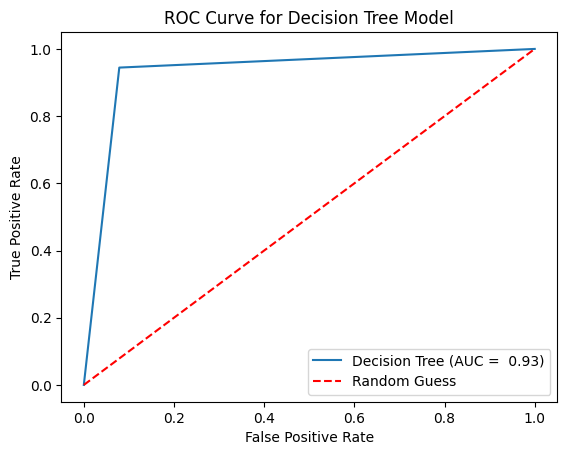

In [374]:
# ROC curve

# Predicted Probabilities
y_pred_proba_gini = clf_gini.predict_proba(X_test)[:,1]
print(y_pred_proba_lr)

fpr_gini, tpr_gini, _ = roc_curve(y_test,y_pred_proba_gini)
roc_auc_gini = auc(fpr_gini, tpr_gini)

plt.plot(fpr_gini, tpr_gini, label=f'Decision Tree (AUC = {roc_auc_gini: .2f})')

plt.plot([0, 1],[0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend()
plt.show()

**'Information Gain' approach**

In [375]:
# Model
clf_entropy = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=3)

#Training
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [376]:
# Model Prediction
y_train_pred_entropy = clf_entropy.predict(X_train)
y_test_pred_entropy = clf_entropy.predict(X_test)

In [377]:
y_train_accuracy_entropy = accuracy_score(y_train, y_train_pred_entropy)
y_test_accuracy_entropy = accuracy_score(y_test, y_test_pred_entropy)

y_train_accuracy_entropy, y_test_accuracy_entropy


(0.9812206572769953, 0.958041958041958)

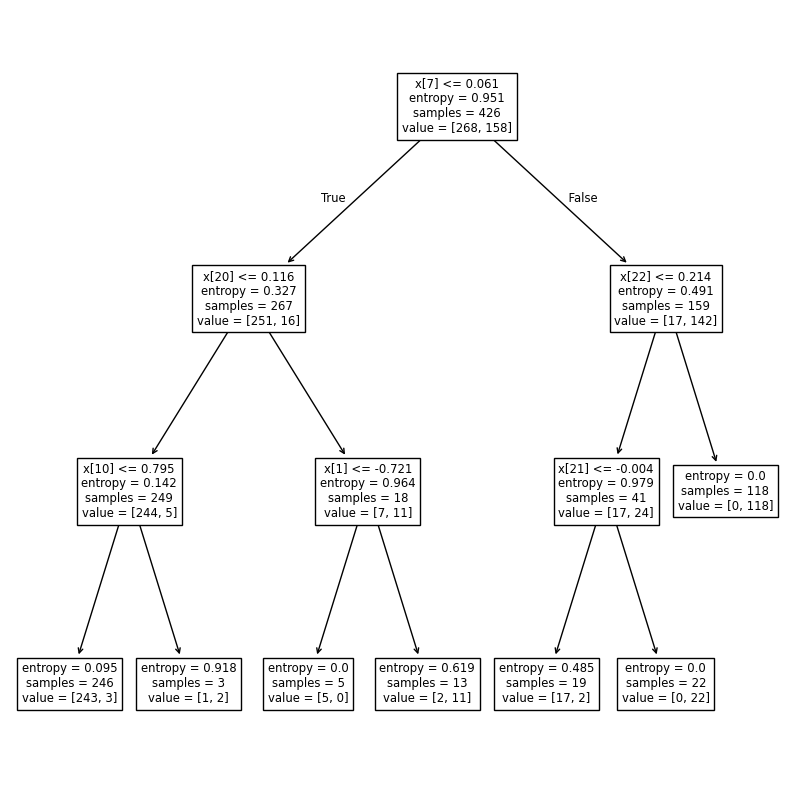

In [378]:
# Plot
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(clf_entropy.fit(X_train, y_train))
plt.show()

In [379]:
# Classification Report

print(classification_report(y_test, y_test_pred_entropy))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        89
           1       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



Confusion Matrix: [[87  2]
 [ 4 50]]




Text(0.5, 23.52222222222222, 'predicted')

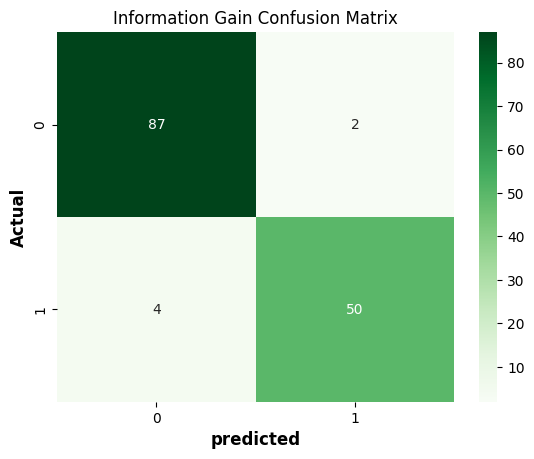

In [380]:
# Confusion Matrix

print('Confusion Matrix:', confusion_matrix(y_test, y_test_pred_entropy))
print('\n')

sns.heatmap(confusion_matrix(y_test, y_test_pred_entropy), annot=True, cmap='Greens')
plt.title('Information Gain Confusion Matrix')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('predicted', fontsize=12, fontweight='bold')

[0.01219512 1.         1.         0.01219512 0.01219512 1.
 1.         1.         0.10526316 0.01219512 0.01219512 1.
 0.01219512 0.10526316 0.01219512 1.         0.01219512 0.01219512
 0.01219512 1.         0.01219512 0.01219512 1.         0.01219512
 0.01219512 0.10526316 0.01219512 0.01219512 0.01219512 1.
 0.01219512 0.01219512 0.66666667 0.01219512 0.01219512 0.01219512
 0.84615385 0.01219512 1.         0.01219512 0.01219512 1.
 0.01219512 0.01219512 0.10526316 0.01219512 0.01219512 0.01219512
 0.01219512 0.01219512 1.         1.         0.01219512 0.10526316
 0.01219512 0.01219512 0.01219512 1.         1.         0.01219512
 0.01219512 1.         1.         0.01219512 0.01219512 0.01219512
 1.         1.         0.01219512 0.01219512 1.         1.
 0.01219512 1.         0.01219512 0.10526316 0.01219512 0.10526316
 0.01219512 0.10526316 1.         0.01219512 0.01219512 1.
 0.84615385 1.         1.         1.         0.01219512 0.01219512
 0.01219512 0.01219512 0.10526316 0.0121951

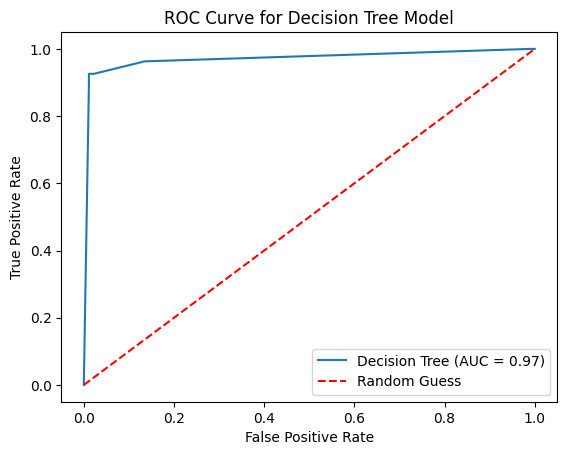

In [381]:
# ROC curve

# Predicted probabilities
y_pred_proba_entropy = clf_entropy.predict_proba(X_test)[:,1]
print(y_pred_proba_entropy)

fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_proba_entropy )
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)

plt.plot(fpr_entropy, tpr_entropy, label=f'Decision Tree (AUC = {roc_auc_entropy:.2f})')

plt.plot([0,1],[0,1],'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend()
plt.show()


# Random Forest

In random forest we use multiple Decision Trees:

- Classification problem :: algorithm takes majority votes of decision trees.

- Regression problem :: algorithm takes mean of decisions.


In [382]:
# Model building
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [383]:
# Model Prediction

y_train_pred_rf = clf_rf.predict(X_train)
y_test_pred_rf = clf_rf.predict(X_test)
y_test_pred_rf

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [384]:
y_test.head()

,diagnosis
204,0
70,1
131,1
431,0
540,0


Model Performance

In [385]:
# Accuracy Matrix

accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test,y_test_pred_rf)

accuracy_train_rf, accuracy_test_rf

(1.0, 0.965034965034965)

In [386]:
# Classification report

print(classification_report(y_test, y_test_pred_rf))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



Confusion Matrix: [[87  2]
 [ 3 51]]




Text(0.5, 23.52222222222222, 'Predicted')

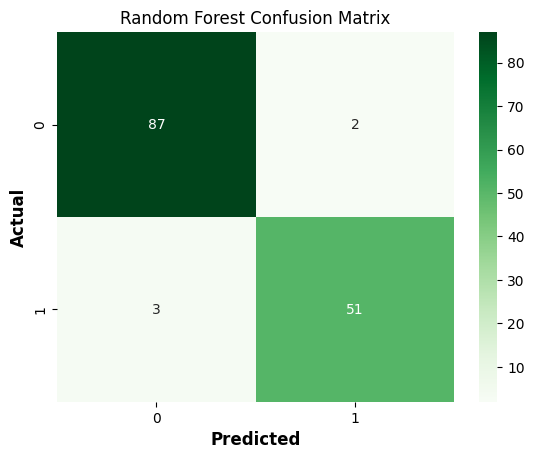

In [387]:
# Confusion Matrix

print('Confusion Matrix:', confusion_matrix(y_test, y_test_pred_rf))
print('\n')

sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')


[0.   1.   1.   0.   0.   1.   1.   0.91 0.68 0.03 0.06 1.   0.09 0.88
 0.01 1.   0.03 0.   0.   1.   0.21 0.   1.   0.   0.   0.09 0.01 0.09
 0.   1.   0.   0.   0.15 0.06 0.   0.   0.69 0.02 1.   0.15 0.   0.98
 0.   0.   0.26 0.01 0.09 0.06 0.02 0.04 0.99 1.   0.28 0.2  0.   0.01
 0.   1.   0.77 0.   0.   1.   1.   0.08 0.   0.1  1.   0.99 0.01 0.04
 0.86 1.   0.   1.   0.02 0.06 0.01 0.44 0.   0.11 0.99 0.   0.33 1.
 0.78 0.98 0.91 0.99 0.01 0.02 0.01 0.2  0.23 0.01 0.   0.   1.   0.99
 0.   1.   0.96 0.   0.97 1.   0.05 0.02 0.01 1.   0.52 0.12 1.   0.
 0.26 1.   0.4  1.   0.   0.09 0.03 0.98 0.31 0.   0.   1.   0.01 1.
 0.99 0.   0.   1.   0.9  0.98 0.11 0.01 0.28 0.86 0.34 0.01 0.37 0.95
 0.01 1.   0.  ]


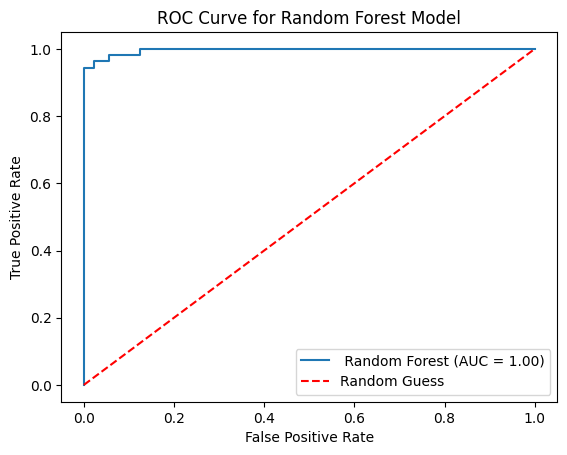

In [388]:
# ROC curve

# Predicted probabilities
y_pred_proba_rf = clf_rf.predict_proba(X_test)[:,1]
print(y_pred_proba_rf)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf )
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label = f' Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0,1],[0,1],'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend()
plt.show()


# Standard Vector Machine

In [389]:
from sklearn.svm import SVC

In [390]:
# model selection
svm_model = SVC(kernel='rbf', C=100, probability=True)

'''Radial Basis Function (RBF) kernel for non-linear data when the relationship between classes is complex.
   It is the default and popular choice for many non-linear classification problems
   because it can capture intricate patterns without prior knowledge of the data. '''
''' -> Smaller values of C yield a wider margin allowing some misclassifications but potentially better generalization on unknown data.
    -> Larger values of C aim to classify all training points correctly, possibly leading to overfitting and poorer performance on unknown data.'''

' -> Smaller values of C yield a wider margin allowing some misclassifications but potentially better generalization on unknown data.\n    -> Larger values of C aim to classify all training points correctly, possibly leading to overfitting and poorer performance on unknown data.'

In [391]:
# svm model training
svm_model.fit(X_train, y_train)

SVC(C=100, probability=True)

In [392]:
# model prediction
y_train_svm_pred = svm_model.predict(X_train)
y_test_svm_pred = svm_model.predict(X_test)
y_test_svm_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [393]:
y_test.head(10)   # Actual values

,diagnosis
204,0
70,1
131,1
431,0
540,0
567,1
369,1
29,1
81,0
477,0


Model Performance

In [394]:

# Model Accuracy score
train_accuracy_svm = accuracy_score(y_train, y_train_svm_pred)
test_accuracy_svm = accuracy_score(y_test, y_test_svm_pred)

print("train_accuracy_svm :",train_accuracy_svm)
print("test_accuracy_svm:",test_accuracy_svm)
print('\n')


train_accuracy_svm : 1.0
test_accuracy_svm: 0.9440559440559441




In [395]:
# Classification report

print(classification_report(y_test,y_test_svm_pred))


              precision    recall  f1-score   support

           0       0.98      0.93      0.95        89
           1       0.90      0.96      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



Confusion matrix: [[83  6]
 [ 2 52]]




Text(0.5, 23.52222222222222, 'Predicted')

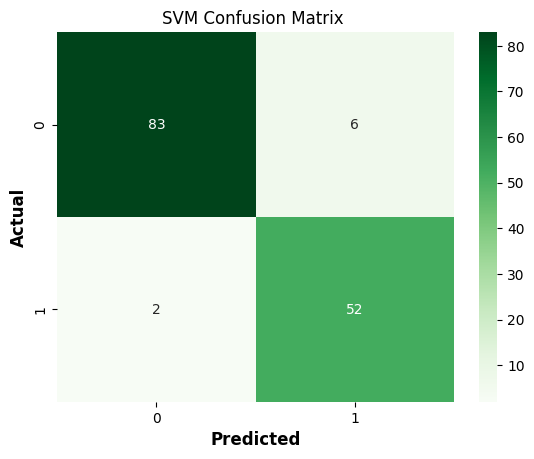

In [396]:
# Confusion Matrix

print(f'Confusion matrix:', confusion_matrix(y_test,y_test_svm_pred))
print('\n')

sns.heatmap(confusion_matrix(y_test,y_test_svm_pred), annot=True, cmap='Greens')
plt.title('SVM Confusion Matrix ')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')

[6.88069898e-02 9.99998633e-01 9.99999056e-01 9.00657646e-05
 7.69704502e-05 9.28767461e-01 9.84576861e-01 7.96251705e-01
 6.84169397e-01 7.15797703e-03 1.68853461e-01 9.74030105e-01
 1.37185524e-03 9.59572502e-01 8.15433657e-03 9.73264748e-01
 7.68162310e-04 2.61313185e-04 8.25824343e-04 9.99995271e-01
 5.98227222e-02 1.15167753e-03 9.95437688e-01 4.53788226e-04
 4.90148474e-05 2.22142508e-03 1.73416770e-04 1.88609165e-02
 2.69245033e-04 9.93816895e-01 8.85497192e-06 1.05297036e-04
 2.81434052e-02 5.38568765e-02 7.74992551e-05 4.90169097e-03
 9.83661051e-01 5.36697372e-02 9.99999982e-01 4.63122619e-03
 4.56419109e-05 1.00000000e+00 2.54707121e-04 3.46351234e-04
 8.40082788e-01 9.28178588e-01 5.81436767e-03 4.41106255e-03
 1.19847850e-01 3.03582086e-04 1.00000000e+00 9.99999395e-01
 2.88997946e-01 6.47435708e-01 9.81828401e-05 2.05266974e-02
 6.84649385e-05 9.13693279e-01 9.87089970e-01 1.30420560e-04
 2.67592373e-04 9.99997870e-01 9.88464165e-01 7.36229675e-02
 3.61929424e-04 1.752040

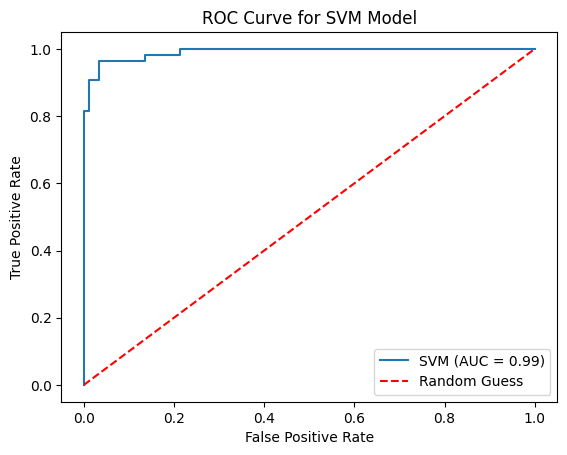

In [397]:
# ROC curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for Logistic Regression model
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]       # probability of being class1 (Benign)
print(y_pred_proba_svm)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend()
plt.show()


# Comparison of Models

Accuracy of Models

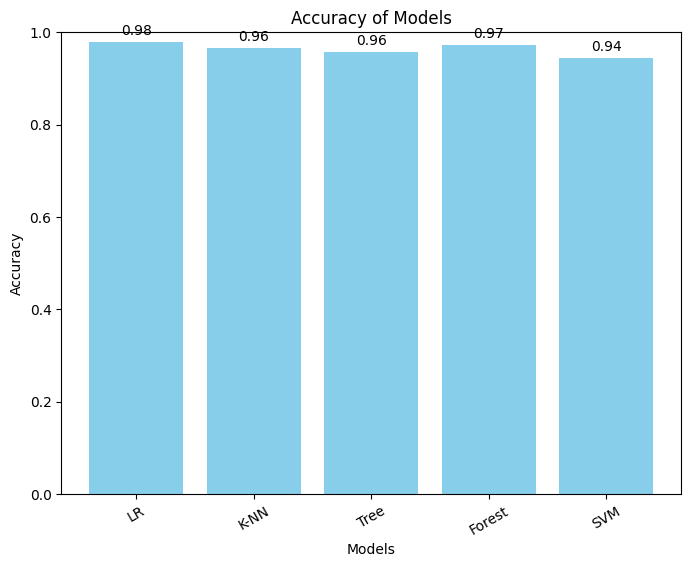

In [398]:
models = ['LR','K-NN','Tree','Forest','SVM']
accuracies = [0.979,0.965,0.958,0.972,0.944]

x= np.arange(len(models))

plt.figure(figsize=(8,6))
bars = plt.bar(x, accuracies, color = 'skyblue')

plt.title('Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(x, models, rotation=30)

# Adding accuracy values on top of each bar
for bar in bars:
  height = bar.get_height()
  plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0,3), textcoords='offset points', ha='center',va='bottom')

plt.ylim(0,1)
plt.show()

Precision of Models

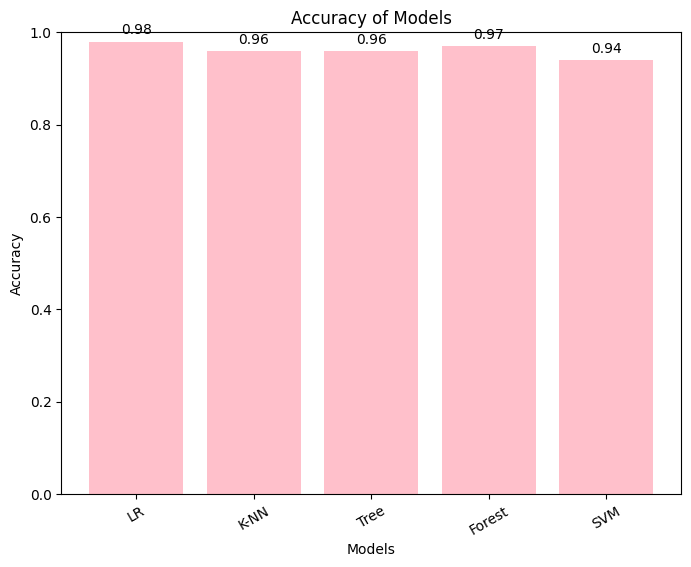

In [399]:
models = ['LR','K-NN','Tree','Forest','SVM']
accuracies = [0.98,0.96,0.96,0.97,0.94]

x= np.arange(len(models))

plt.figure(figsize=(8,6))
bars = plt.bar(x, accuracies, color = 'pink')

plt.title('Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(x, models, rotation=30)

# Adding accuracy values on top of each bar
for bar in bars:
  height = bar.get_height()
  plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0,3), textcoords='offset points', ha='center',va='bottom')

plt.ylim(0,1)
plt.show()